Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.0523 - loss: 2.5124 - val_accuracy: 0.1500 - val_loss: 2.2971
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1992 - loss: 2.2715 - val_accuracy: 0.1000 - val_loss: 2.4567
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1875 - loss: 2.1371 - val_accuracy: 0.0500 - val_loss: 2.3773
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3008 - loss: 2.0777 - val_accuracy: 0.0500 - val_loss: 2.2605
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3586 - loss: 1.9763 - val_accuracy: 0.1000 - val_loss: 2.2233
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3461 - loss: 1.8859 - val_accuracy: 0.1000 - val_loss: 2.3241
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5008 - loss: 1.7780 - val_accuracy: 0.1500 - val_loss: 2.3453
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6594 - loss: 1.6762 - val_accuracy: 0.1000 - val_loss: 2.3035
Epoch 9/10
3/3 ━━━

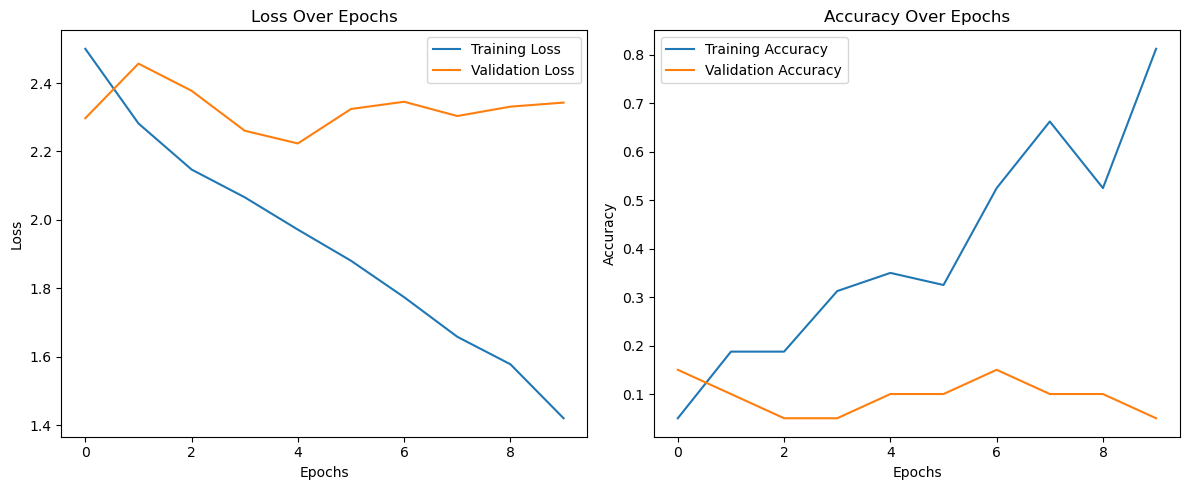

In [5]:
!pip install tensorflow

import pandas as pd
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt


data = pd.read_csv('Neural.csv')


X = data.iloc[:, :-1].values  
y = data.iloc[:, -1].values   


X = X / 255.0


y = tf.keras.utils.to_categorical(y, len(set(y)))


model = Sequential([
    Dense(128, activation='relu', input_shape=(X.shape[1],)),  
    Dense(64, activation='relu'),                             
    Dense(y.shape[1], activation='softmax')                  
])


model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


history = model.fit(X, y, 
                    epochs=10, 
                    validation_split=0.2, 
                    batch_size=32, 
                    verbose=1)


loss, accuracy = model.evaluate(X, y)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")


plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
